In [4]:
import requests
import matplotlib.pyplot as plt
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch
from io import BytesIO

In [5]:
# Init model, transforms
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
feature_extractor = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')

config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/197 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [2]:
# Define age group labels with corresponding age ranges
age_groups = {
    0: "0-2 years",
    1: "3-9 years",
    2: "10-19 years",
    3: "20-29 years",
    4: "30-39 years",
    5: "40-49 years",
    6: "50-59 years",
    7: "60-69 years",
    8: "70+ years"
}

In [3]:
def predict_age(image_path_or_url):
    """
    Predicts the age group from an image.
    Displays the image in a small format before prediction.
    
    Args:
        image_path_or_url (str): Path to a local image or URL of an image.
    
    Returns:
        str: Predicted age group.
    """
    # Load image from local file or URL
    if image_path_or_url.startswith("http"):
        response = requests.get(image_path_or_url)
        image = Image.open(BytesIO(response.content))
    else:
        image = Image.open(image_path_or_url)
    
    # Display the image in a small format
    plt.figure(figsize=(3, 3))  # Adjust size as needed
    plt.imshow(image)
    plt.axis("off")  # Hide axes
    plt.show()

    # Preprocess the image
    inputs = feature_extractor(images=image, return_tensors="pt")

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted class index
    predicted_index = outputs.logits.argmax(dim=1).item()

    # Get corresponding age group
    predicted_age_group = age_groups.get(predicted_index, "Unknown age group")

    return predicted_age_group

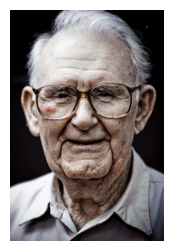

Predicted Age (Local): 70+ years


In [6]:
# Example usage:
image_path = "/kaggle/input/human-faces/Humans/1 (1).jpeg"  # Replace with a valid image path

print(f"Predicted Age (Local): {predict_age(image_path)}")


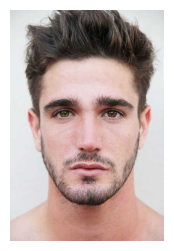

Predicted Age (Local): 20-29 years


In [7]:
# Example usage:
image_path = "/kaggle/input/human-faces/Humans/1 (1).jpg"  # Replace with a valid image path

print(f"Predicted Age (Local): {predict_age(image_path)}")


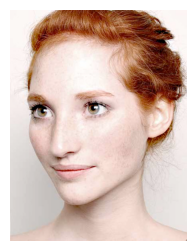

Predicted Age (Local): 20-29 years


In [12]:
# Example usage:
image_path = "/kaggle/input/human-faces/Humans/1 (100).png"  # Replace with a valid image path

print(f"Predicted Age (Local): {predict_age(image_path)}")


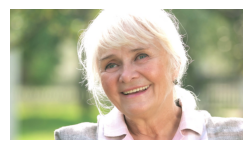

Predicted Age (Local): 60-69 years


In [13]:
# Example usage:
image_path = "/kaggle/input/human-faces/Humans/1 (101).png"  # Replace with a valid image path

print(f"Predicted Age (Local): {predict_age(image_path)}")
